In [432]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

In [433]:
dia = load_diabetes()
dia

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

## 이진 분류 모델을 구현해 봅시다.
- 대상 : 당뇨병 데이터
- 분류 기준 : 당뇨병 환자 / 아닌 사람
- 입력 데이터 : 혈당을 제외한 데이터 중 선택

In [434]:
X_df = pd.DataFrame(dia['data'], columns=dia['feature_names']).iloc[:,:-1] # 혈당 제외하고 데이터프레임 생성

In [435]:
X_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529


In [436]:
y_tar = dia['target']

In [437]:
y = y_tar >= 126 # (넘파이 배열) 배열 속의 값이 126 이상인지 따진 bool값을 배열에 담는다.

In [438]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=.2, random_state=12345)

In [439]:
rfc = RandomForestClassifier(n_estimators=3000, random_state=12345, max_depth=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, n_estimators=3000, random_state=12345)

In [448]:
rfc.score(X_train, y_train) 

1.0

In [441]:
pred = rfc.predict(X_test) # 학습용 데이터에서 정확도 점수가 1.0이 나오고 테스트 데이터 정확도가 낮으면 거의 과적합일 가능성이 높다.
pred

array([False,  True, False,  True, False,  True,  True,  True,  True,
       False, False,  True, False, False,  True,  True,  True, False,
       False,  True, False,  True, False,  True, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True, False,
       False, False,  True,  True, False,  True,  True,  True, False,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False,  True,  True])

In [442]:
y_test

array([False, False, False, False, False,  True,  True, False,  True,
        True,  True,  True, False, False, False, False,  True, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
       False,  True,  True, False, False, False,  True, False])

In [449]:
metrics.accuracy_score(y_test, pred) # 정확도

0.651685393258427

In [451]:
met = metrics.confusion_matrix(y_test, pred, labels=[True,False]) # 혼동 행렬

In [453]:
pd.DataFrame(
    met, columns=['diabetes_pred', 'normal_pred'], index=['diabetes_truth', 'normal_truth']
)

,diabetes_pred,normal_pred
diabetes_truth,35,14
normal_truth,17,23


In [445]:
rep = classification_report(y_test, pred) # 분류 결과를 나타내는 함수
# precision과 recall의 가중 조화평균(weight harmonic average)을 F-score라 한다.
# support : 각 라벨의 샘플 갯수
# macro avg : 평균의 평균(단순평균)
# weighted avg : 각 클래스에 속하는 표본의 개수로 가중 평균을 내서 계산하는 방법. 샘플 개수의 불균형을 고려한다.
print(rep)

              precision    recall  f1-score   support

       False       0.62      0.57      0.60        40
        True       0.67      0.71      0.69        49

    accuracy                           0.65        89
   macro avg       0.65      0.64      0.65        89
weighted avg       0.65      0.65      0.65        89



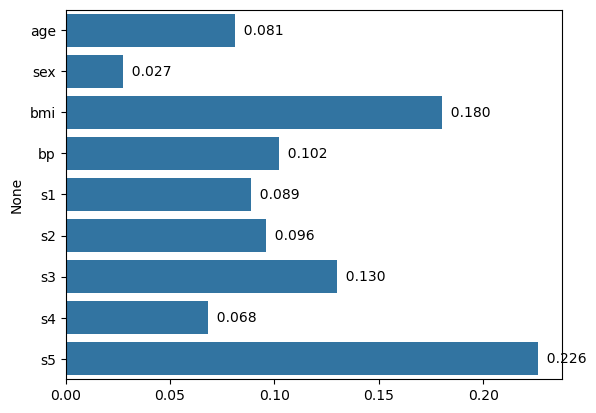

In [446]:
ax = sns.barplot(x=rfc.feature_importances_, y=X_df.columns) # 요소들이 예측에 영향을 주는 정도를 시각화
ax.bar_label(ax.containers[0], fmt="  %.3f")
plt.show()

과적합인 모델에서 영향도가 낮은 요소를 뺴거나, 영향도가 높은 것의 가중치를 하향 조정하는 방법들을 고려할 수 있다.

보고서 쓸때 : raw 데이터는 올리지 말고 엑셀에 넣든지 해서 별첨한다.

보고서에 절대 소스코드를 복붙하거나 캡쳐해 올리지 말고 직접 어떠어떠한 파라미터를 어떻게 설정했다고 적고,  소스코드를 보여주려면 깃허브 링크를 달던지 한다.

머신러닝 모델을 설명하고 보고서 작성 할 때는 어떤 작업을 했는지 자세하게 적어야 하고, 무슨 결론을 도출했고 어떤 결과가 나왔는지까지 적어서 결론지어야 한다.